In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 프로젝트 셋팅

In [3]:
# 학습이 완료된 모델을 저장할 파일 이름
best_model_path = 'model/best_model_regression_choice_fa_2024.dat'
# 교차검증 횟수
cv_count = 10
# 교차 검증
kfold = KFold(n_splits=cv_count, shuffle=True, random_state=1)
# 평가 결과를 담을 리스트
# 필요하다면 다른 것도 만들어주세요
mse_score_list = []
# 학습 모델 이름
model_name_list = []

### 데이터 준비
- 데이터를 읽어오고 필요한 전처리까지 다 한다음 입력데이터는 train_X, 결과데이터는 train_y라는 변수에 담아서 준비해주세요

In [5]:
# 데이터를 불러온다.
df1 = pd.read_csv('머신러닝_피처선택_2017~2024FA.csv')
# 입력과 결과로 나눈다.
X = df1.drop('1년당 계약 총액', axis=1)
y = df1['1년당 계약 총액']

In [6]:
# 전처리
scaler1 = StandardScaler()
scaler1.fit(X)
X2 = scaler1.transform(X)

In [7]:
# 학습할 데이터를 변수에 담아준다.
train_X = X2
train_y = y

### 기본 모델 사용하기

In [9]:
# KNN
knn_basic_model = KNeighborsRegressor()
# 교차 검증을 수행한다
r1 = cross_val_score(knn_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("KNN Basic")

In [10]:
# LinearRegression
lr_basic_model = LinearRegression()
# 교차 검증을 수행한다
r1 = cross_val_score(lr_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("LinearRegression Basic")

In [11]:
# Ridge
ridge_basic_model = Ridge()
# 교차 검증을 수행한다
r1 = cross_val_score(ridge_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("Ridge Basic")

In [12]:
# Lasso
lasso_basic_model = Lasso()
# 교차 검증을 수행한다
r1 = cross_val_score(lasso_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("Lasso Basic")

In [13]:
# ElasticNet
en_basic_model = ElasticNet()
# 교차 검증을 수행한다
r1 = cross_val_score(en_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("ElasticNet Basic")

In [14]:
# SVR
svr_basic_model = SVR()
# 교차 검증을 수행한다
r1 = cross_val_score(svr_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("SVR Basic")

In [15]:
# DecisionTree
tree_basic_model = DecisionTreeRegressor()
# 교차 검증을 수행한다
r1 = cross_val_score(tree_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("DecisionTree Basic")

In [16]:
# RandomForest
rf_basic_model = RandomForestRegressor()
# 교차 검증을 수행한다
r1 = cross_val_score(rf_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("RandomForest Basic")

In [17]:
# AdaBoost
ada_basic_model = AdaBoostRegressor()
# 교차 검증을 수행한다
r1 = cross_val_score(ada_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("AdaBoost Basic")

In [18]:
# GradientBoost
gb_basic_model = GradientBoostingRegressor()
# 교차 검증을 수행한다
r1 = cross_val_score(gb_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("GradientBoost Basic")

In [19]:
# LGBM
lgbm_basic_model = LGBMRegressor(verbose=-1)
# 교차 검증을 수행한다
r1 = cross_val_score(lgbm_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("LGBM Basic")

In [20]:
# XGBoost
xgb_basic_model = XGBRegressor(verbose=-1, slient=True)
# 교차 검증을 수행한다
r1 = cross_val_score(xgb_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("XGBoost Basic")

[18:48:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "s

In [21]:
# Voting을 구성하기 위한 모델 목록
model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge()
model4 = Lasso()
model5 = ElasticNet()
model6 = SVR()
model7 = DecisionTreeRegressor()
model8 = RandomForestRegressor()
model9 = AdaBoostRegressor()
model10 = GradientBoostingRegressor()
model11 = LGBMRegressor(verbose=-1)
model12 = XGBRegressor(verbose=-1, slient=True)

hard_voting_basic_model_list = [
    ('model1', model1),
    ('model2', model2),
    ('model3', model3),
    ('model4', model4),
    ('model5', model5),
    ('model6', model6),
    ('model7', model7),
    ('model8', model8),
    ('model9', model9),
    ('model10', model10),
    ('model11', model11),
    ('model12', model12),
]

hard_voting_basic_model = VotingRegressor(estimators=hard_voting_basic_model_list)

# 교차 검증을 수행한다
r1 = cross_val_score(hard_voting_basic_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("HardVoting Basic")

[18:48:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[18:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "s

In [22]:
d1 = {
    'mse' : mse_score_list
}
test_df = pd.DataFrame(d1, index=model_name_list)
test_df

,mse
KNN Basic,1.504215e+09
LinearRegression Basic,1.819992e+09
Ridge Basic,1.808203e+09
Lasso Basic,1.830293e+09
ElasticNet Basic,1.888666e+09
SVR Basic,5.261753e+09
DecisionTree Basic,3.310104e+09
RandomForest Basic,1.733213e+09
AdaBoost Basic,1.854283e+09
GradientBoost Basic,1.466046e+09


### 하이퍼 파라미터 튜닝

In [42]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'n_neighbors' : [3, 4, 5, 6, 7, 8, 9, 10]
}
# 사용할 모델 객체를 생성한다.
knn_tuning_model = KNeighborsRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
knn_grid_clf = GridSearchCV(knn_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
knn_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(knn_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("KNN Tuning")

In [25]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
ridge_tuning_model = Ridge()
# 최적의 하이퍼 파라미터를 찾는다.
ridge_grid_clf = GridSearchCV(ridge_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
ridge_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(ridge_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("Ridge Tuning")

In [26]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
lasso_tuning_model = Lasso()
# 최적의 하이퍼 파라미터를 찾는다.
lasso_grid_clf = GridSearchCV(lasso_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
lasso_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(lasso_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("Lasso Tuning")

In [27]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
en_tuning_model = ElasticNet()
# 최적의 하이퍼 파라미터를 찾는다.
en_grid_clf = GridSearchCV(en_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
en_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(en_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("ElasticNet Tuning")

In [28]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
svr_tuning_model = SVR()
# 최적의 하이퍼 파라미터를 찾는다.
svr_grid_clf = GridSearchCV(svr_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
svr_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(svr_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("SVR Tuning")

In [29]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
# 사용할 모델 객체를 생성한다.
tree_tuning_model = DecisionTreeRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
tree_grid_clf = GridSearchCV(tree_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
tree_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(tree_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("DecisionTree Tuning")

In [30]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300]
}
# 사용할 모델 객체를 생성한다.
rf_tuning_model = RandomForestRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
rf_grid_clf = GridSearchCV(rf_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
rf_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(rf_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("RandomForest Tuning")

In [31]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 0, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
ada_tuning_model = AdaBoostRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
ada_grid_clf = GridSearchCV(ada_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
ada_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(ada_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("AdaBoost Tuning")

In [32]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 0, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
gb_tuning_model = GradientBoostingRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
gb_grid_clf = GridSearchCV(gb_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
gb_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(gb_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("GradientBoost Tuning")

In [33]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 0, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
lgbm_tuning_model = LGBMRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
lgbm_grid_clf = GridSearchCV(lgbm_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
lgbm_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(lgbm_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("LGBM Tuning")

In [34]:
# 튜닝할 하이퍼 파라미터 후보 값
params = {
    'booster' : ['gbtree', 'gblinear'],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1, 0, 10, 100, 1000, 10000]
}
# 사용할 모델 객체를 생성한다.
xgb_tuning_model = XGBRegressor()
# 최적의 하이퍼 파라미터를 찾는다.
xgb_grid_clf = GridSearchCV(xgb_tuning_model, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
xgb_grid_clf.fit(train_X, train_y)

# 평가 결과를 담아준다.
mse_score_list.append(abs(xgb_grid_clf.best_score_))
# 학습 모델 이름을 담아준다.
model_name_list.append("XGB Tuning")

In [44]:
# Voting을 구성하기 위한 모델 목록
model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge()
model4 = Lasso()
model5 = ElasticNet()
model6 = SVR()
model7 = DecisionTreeRegressor()
model8 = RandomForestRegressor()
model9 = AdaBoostRegressor()
model10 = GradientBoostingRegressor()
model11 = LGBMRegressor(verbose=-1)
model12 = XGBRegressor(verbose=-1, slient=True)

# 튜닝 과정에서 찾은 최적의 하이퍼 파라미터를 셋팅해준다.
model1.set_params(**knn_grid_clf.best_params_)
model3.set_params(**ridge_grid_clf.best_params_)
model4.set_params(**lasso_grid_clf.best_params_)
model5.set_params(**en_grid_clf.best_params_)
model6.set_params(**svr_grid_clf.best_params_)
model7.set_params(**tree_grid_clf.best_params_)
model8.set_params(**rf_grid_clf.best_params_)
model9.set_params(**ada_grid_clf.best_params_)
model10.set_params(**gb_grid_clf.best_params_)
model11.set_params(**lgbm_grid_clf.best_params_)
model12.set_params(**xgb_grid_clf.best_params_)


hard_voting_tuning_model_list = [
    ('model1', model1),
    ('model2', model2),
    ('model3', model3),
    ('model4', model4),
    ('model5', model5),
    ('model6', model6),
    ('model7', model7),
    ('model8', model8),
    ('model9', model9),
    ('model10', model10),
    ('model11', model11),
    ('model12', model12),
]

hard_voting_tuning_model = VotingRegressor(estimators=hard_voting_tuning_model_list)

# 교차 검증을 수행한다
r1 = cross_val_score(hard_voting_tuning_model, train_X, train_y, scoring='neg_mean_squared_error', cv=kfold)
# 평가 결과를 담아준다.
mse_score_list.append(abs(r1.mean()))
# 학습 모델 이름을 담아준다.
model_name_list.append("HardVoting Tuning")

[19:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[19:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[19:47:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[19:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.

[19:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "s

In [45]:
d1 = {
    'mse' : mse_score_list
}
result_df = pd.DataFrame(d1, index=model_name_list)
result_df.sort_values(by='mse', inplace=True)
result_df

,mse
KNN Tuning,4.833101e+08
KNN Tuning,1.026955e+09
HardVoting Tuning,1.227771e+09
HardVoting Tuning,1.322951e+09
GradientBoost Tuning,1.412053e+09
LGBM Tuning,1.422311e+09
LGBM Basic,1.439005e+09
HardVoting Basic,1.447059e+09
XGB Tuning,1.465494e+09
GradientBoost Basic,1.466046e+09


[19:48:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "slient", "verbose" } are not used.



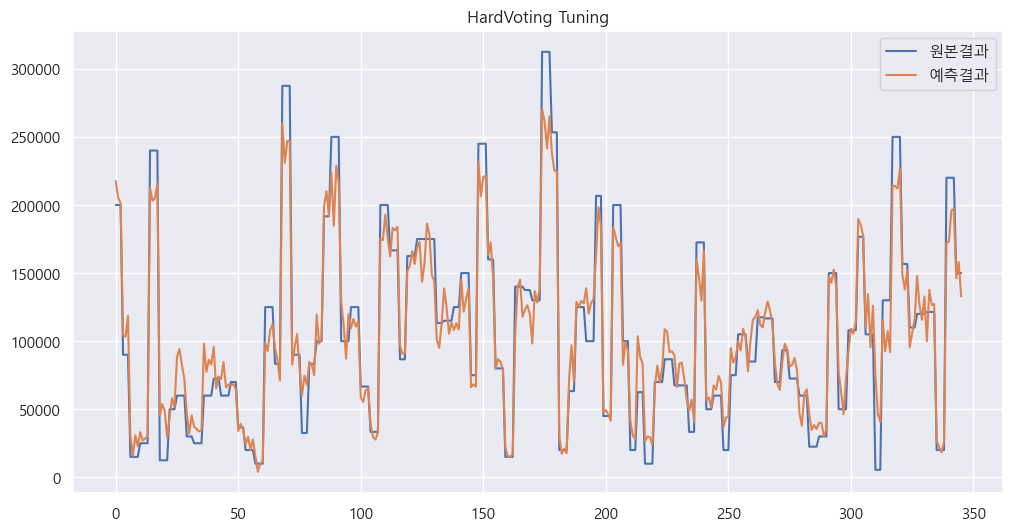

In [46]:
# 결과를 예측한다.
hard_voting_tuning_model.fit(train_X, train_y)

y_pred = hard_voting_tuning_model.predict(train_X)

plt.plot(train_y.values, label='원본결과')
plt.plot(y_pred, label='예측결과')
plt.title('HardVoting Tuning')
plt.legend()
plt.show()

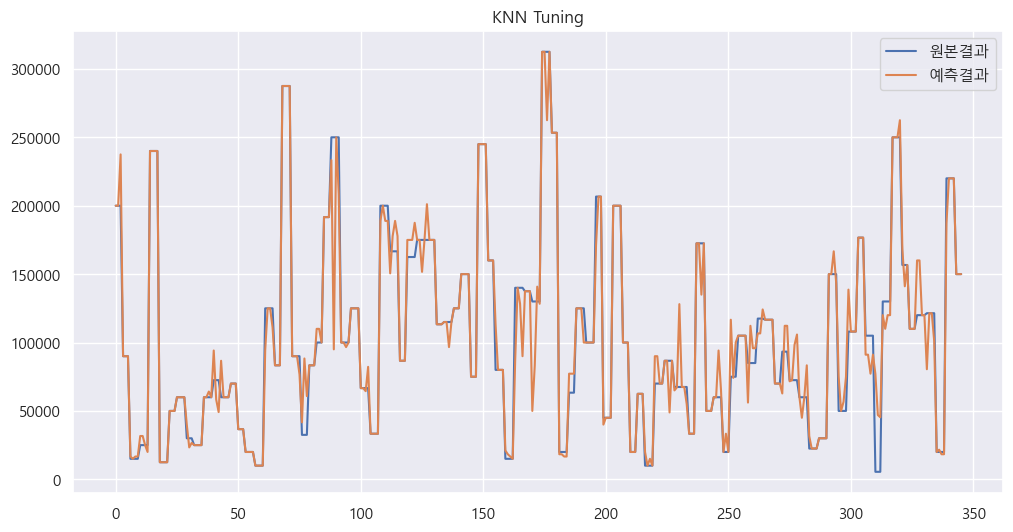

In [62]:
knn_grid_clf.fit(train_X, train_y)

y_pred = knn_grid_clf.best_estimator_.predict(train_X)

plt.plot(train_y.values, label='원본결과')
plt.plot(y_pred, label='예측결과')
plt.title('KNN Tuning')
plt.legend()
plt.show()

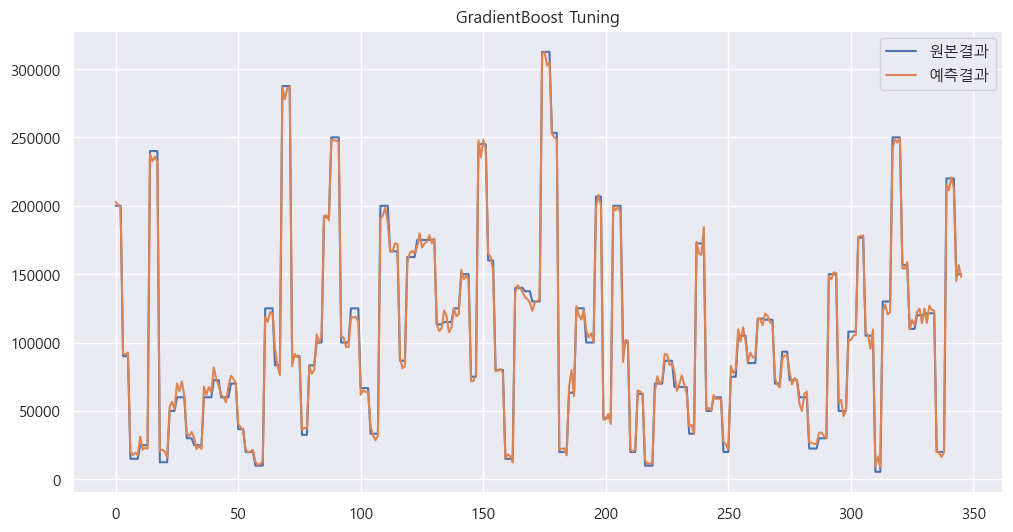

In [64]:
gb_grid_clf.fit(train_X, train_y)

y_pred = gb_grid_clf.predict(train_X)

plt.plot(train_y.values, label='원본결과')
plt.plot(y_pred, label='예측결과')
plt.title('GradientBoost Tuning')
plt.legend()
plt.show()

### 학습 모델 등을 저장한다.

In [41]:
10/0

ZeroDivisionError: division by zero

In [76]:
# 학습 모델 객체를 생성한다.
best_model = KNeighborsRegressor()
# 하이퍼 파라미터를 설정한다.
best_model.set_params(**knn_grid_clf.best_params_)
# 전체 데이터를 학습시킨다.
best_model.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=3)

In [78]:
# 학습 모델 등을 저장한다.
with open(best_model_path, 'wb') as fp :
    pickle.dump(best_model, fp)
    pickle.dump(scaler1, fp)

print('저장완료')

저장완료


In [58]:
# model = KNeighborsRegressor()  # Basic
# model = knn_grid_clf.best_estimator_  # Tuned (GridSearchCV 결과)

# model = LinearRegression()

# model = Ridge()  # Basic
# model = ridge_grid_clf.best_estimator_  # Tuned

# model = Lasso()  # Basic
# model = lasso_grid_clf.best_estimator_  # Tuned

# model = ElasticNet()  # Basic
# model = en_grid_clf.best_estimator_  # Tuned

# model = SVR()  # Basic
# model = svr_grid_clf.best_estimator_  # Tuned

# model = DecisionTreeRegressor()  # Basic
# model = tree_grid_clf.best_estimator_  # Tuned

# model = RandomForestRegressor()  # Basic
# model = rf_grid_clf.best_estimator_  # Tuned

# model = AdaBoostRegressor()  # Basic
# model = adb_grid_clf.best_estimator_  # Tuned

# model = GradientBoostingRegressor()  # Basic
model = gb_grid_clf.best_estimator_  # Tuned

# model = LGBMRegressor(verbose=-1)  # Basic
# model = lgbm_grid_clf.best_estimator_  # Tuned

# model = XGBRegressor(verbosity=0)  # Basic
# model = xgb_grid_clf.best_estimator_  # Tuned

# model = VotingRegressor(estimators=hard_voting_basic_model_list)  # Basic
# model = VotingRegressor(estimators=hard_voting_tuning_model_list)

In [60]:
# 모델 학습
model.fit(train_X, train_y)

# 예측
y_pred = model.predict(train_X)

# 평가 지표 계산
mse = mean_squared_error(train_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train_y, y_pred)
r2 = r2_score(train_y, y_pred)

# 출력
print(f"모델: {model.__class__.__name__}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

모델: GradientBoostingRegressor
MSE: 12144667.3283
RMSE: 3484.9200
MAE: 2764.6078
R2: 0.9976
